In [1]:
##sonor datset...to check rock or mine
##binary classification..then can use logistic regression n other classification algo

##Data description
##write the datadescription
##The task is to train a netwrok to discriminate the sonar signals bounced off a roughly cylinderical rock.the dataset contain 111
##patterns obtained by bouncing sonar signals off a metal cylinder at variousangles and at various conditions.
## 1 if oject is rock 1 and 0 if object is mine

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [17]:
df=pd.read_csv("sonar.csv")
df.head()
pd.set_option("display.max_rows",None)
##above command used so that all the rows are displayed we run any command not just intial 5 and last 5

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
0.0200    207 non-null float64
0.0371    207 non-null float64
0.0428    207 non-null float64
0.0207    207 non-null float64
0.0954    207 non-null float64
0.0986    207 non-null float64
0.1539    207 non-null float64
0.1601    207 non-null float64
0.3109    207 non-null float64
0.2111    207 non-null float64
0.1609    207 non-null float64
0.1582    207 non-null float64
0.2238    207 non-null float64
0.0645    207 non-null float64
0.0660    207 non-null float64
0.2273    207 non-null float64
0.3100    207 non-null float64
0.2999    207 non-null float64
0.5078    207 non-null float64
0.4797    207 non-null float64
0.5783    207 non-null float64
0.5071    207 non-null float64
0.4328    207 non-null float64
0.5550    207 non-null float64
0.6711    207 non-null float64
0.6415    207 non-null float64
0.7104    207 non-null float64
0.8080    207 non-null float64
0.6791    207 non-null floa

In [6]:
df.shape

(207, 61)

In [12]:
df.dtypes

0.0200    float64
0.0371    float64
0.0428    float64
0.0207    float64
0.0954    float64
0.0986    float64
0.1539    float64
0.1601    float64
0.3109    float64
0.2111    float64
0.1609    float64
0.1582    float64
0.2238    float64
0.0645    float64
0.0660    float64
0.2273    float64
0.3100    float64
0.2999    float64
0.5078    float64
0.4797    float64
0.5783    float64
0.5071    float64
0.4328    float64
0.5550    float64
0.6711    float64
0.6415    float64
0.7104    float64
0.8080    float64
0.6791    float64
0.3857    float64
           ...   
0.2604    float64
0.5121    float64
0.7547    float64
0.8537    float64
0.8507    float64
0.6692    float64
0.6097    float64
0.4943    float64
0.2744    float64
0.0510    float64
0.2834    float64
0.2825    float64
0.4256    float64
0.2641    float64
0.1386    float64
0.1051    float64
0.1343    float64
0.0383    float64
0.0324    float64
0.0232    float64
0.0027    float64
0.0065    float64
0.0159    float64
0.0072    float64
0.0167    

In [15]:
# we have 207 rows and 61 columns including target variable
df.describe()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,...,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,...,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,...,0.020700,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [ ]:
##count=207...all column as 207 so no missing value
##mean...
##median..
##if difference in mena and nedian then skewness
##if hugh difference in mean and max value then chance of outlier
##here we have 61 columns but all are not being displayed so will cheeck each column separetly for skewness and outliers.

In [14]:
df.isnull().sum()

0.0200    0
0.0371    0
0.0428    0
0.0207    0
0.0954    0
0.0986    0
0.1539    0
0.1601    0
0.3109    0
0.2111    0
0.1609    0
0.1582    0
0.2238    0
0.0645    0
0.0660    0
0.2273    0
0.3100    0
0.2999    0
0.5078    0
0.4797    0
0.5783    0
0.5071    0
0.4328    0
0.5550    0
0.6711    0
0.6415    0
0.7104    0
0.8080    0
0.6791    0
0.3857    0
         ..
0.2604    0
0.5121    0
0.7547    0
0.8537    0
0.8507    0
0.6692    0
0.6097    0
0.4943    0
0.2744    0
0.0510    0
0.2834    0
0.2825    0
0.4256    0
0.2641    0
0.1386    0
0.1051    0
0.1343    0
0.0383    0
0.0324    0
0.0232    0
0.0027    0
0.0065    0
0.0159    0
0.0072    0
0.0167    0
0.0180    0
0.0084    0
0.0090    0
0.0032    0
R         0
Length: 61, dtype: int64

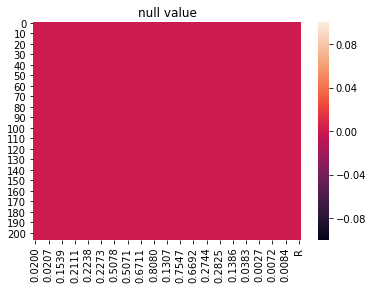

In [18]:
sns.heatmap(df.isnull())
plt.title("null value")
plt.show()

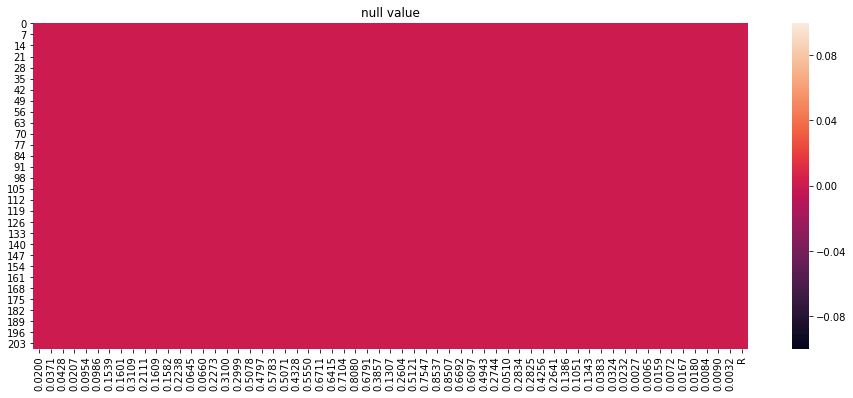

In [19]:
##in this plot on x-axis we are not able to see all the columns so it is a problem..so lot column
##so icrease the size of plot
plt.figure(figsize=[16,6])
sns.heatmap(df.isnull())
plt.title("null value")
plt.show()

In [20]:
##EDA very important plot
##df["class"].hist(grid=True) # univariante analysis
##plt.title("Rock vs Mine")
##plt.show()

In [21]:
##Class imbalance..if suppose 4 classes
##here we don't have any class imbalance problem here
##clas is target variable
##observation..both class are almost qually distributed and no class imbalance noticed

In [22]:
##bivariante analysis
##plt.scatter(df["V1"],df[V2],alpha=0.5,c=(0,0,0),edgecolors="red")
##plt.title("V1 vs V2")
##plt.show()
##observation..both having some linear relationship


In [23]:
##check correlation
##corr_mat=df.corr()
##corr_mat
##sns.heat(corr_mat,anot=True)
##plt.title("correaltion matrix")
##plt.show()

##here we have all teh column but no target variable
##becoz our target variable is categorical

In [24]:
##so convert the target from categorical type to numerical type
##so apply labelencoder..for target we always apply labelencoder
##even we covert target varibale we cannot read the value in heatmap..also size cannot further increased

In [25]:
##from sklearn.preprocessing import LabelEncoder
##le=LabelEncoder()
##df["class"]=le.fit_tranform(df["class"])

In [26]:
##now again apply
##check correlation
##corr_mat=df.corr()
##corr_mat
##sns.heat(corr_mat,anot=True)
##plt.title("correaltion matrix")
##plt.show()



In [27]:
##reading the value in heatmap problem
##corr_mat=df.corr()
##corr_mat["class"].sort_values(ascending=False)
##it will tell about correaltion of each variable with class


In [28]:
##we can always remove the column with very less correaltion but that will be our last option


In [29]:
##let's check the distribution among all the columns
##sp multivariante analysis
##plt.plot()
##plot.show()

In [30]:
##sns.pairplot(df)
##plt.show
##check for skewness
##example of multivariate analysis
##check for outliers always before splitting the dataset
##why becoz that row get deleted as we remove the outlier so target for that row also must be removed

In [31]:
##check for skewness
##split the data
##x=df.drop("class",axis=1)
##y=df.class

##rule..check for outlier remove...becoz lot skewness will be removed automatically
##then go for skewness

In [32]:
##x.skew()
##skewness greater than 0.5 is high

In [33]:
##from  sklearn.preprocessing import power_transform
##df_new=power_transform(x)
##df_new=pd.DataFrame(df_new,columns=df.columns)
##it will remove the skewness for all the column

In [34]:
##checking outliers all the column together
##x.boxplot(figsize=[20,8]
##plt.subplots_adjust(botton=.25)
##plt.show()

In [35]:
##other methdo boxplot for suppose 100 columns..so we split
##first 30
##x.iloc[:,0:30].boxplot(figsize=[20,8]
##plt.subplots_adjust(botton=.25)
##plt.show()

In [36]:
##last 30
##x.iloc[:,30:].boxplot(figsize=[20,8]
##plt.subplots_adjust(botton=.25)
##plt.show()

In [1]:
##we have not removed the outlier in the dataset
##becoz if we see outlier very close to the whisker then we avoid removing the outlier as not impacting the mean much.

##obeservation..we can see one or two values for total 3 columns as outliers of whiskers but they are very near to the whiskers
##so they are not outliers

In [3]:
##finding the best random variable
##from sklearn.linear_model import LogisticRegression
##Maxaccu=0
##Rs=0
##for i in range(1,200):
##    xtrain,ytrain,xtest,ytest=train_test_split(x,y,test_size=.30,random_state=i)
##    lr=LogisticRegression()
##    lr.fit(xtrain,ytrain)
##    pred=lr.predict(xtest)
##    accu=accuracy_score(pred,ytest)
##    if accu>Maxaccu:
##        Maxaccu=accu
##        Rs=i
##print"(with random state as",Rs,"max accuracy is",Maxaccu)

In [4]:
##now training the model with random state as 137
##xtrain,ytrain,xtest,ytest=train_test_split(x,y,test_size=.30,random_state=120)
##lr=LogisticRegression()
##lr.fit(xtrain,ytrain)
##pred=lr.predict(xtest)
##accu=accuracy_score(pred,ytest)
##confusion_matrix(pred,ytest)
##classification_report(pred,ytest)
##print(accu)

In [5]:
##from sklearn.tree import DecisionTreeClassifier
##dtc=DecisionTreeClassifier()
##dtc.fit(xtrain,ytrain)
##pred=dtc.predict(xtest)
##accu=accuracy_score(pred,ytest)
##confusion_matrix(pred,ytest)
##classification_report(pred,ytest)
##print(accu)

In [6]:
##from sklearn.ensemble import RandomForestClassifier
##rfc=RandomForestClassifier()
##c.fit(xtrain,ytrain)
##pred=dtc.predict(xtest)
##accu=accuracy_score(pred,ytest)
##confusion_matrix(pred,ytest)
##classification_report(pred,ytest)
##print(accu)

In [7]:
##from sklearn.svm import SVC
##svc=SVC()
##svc.fit(xtrain,ytrain)
##pred=svc.predict(xtest)
##accu=accuracy_score(pred,ytest)
##confusion_matrix(pred,ytest)
##classification_report(pred,ytest)
##print(accu)

In [8]:
##we cannot rely on accuracy score it may due to overfitting so we use cross validation
##from sklearn.model_selection import cross_val_score
##model=[lr,dtc,rfc,svc]
##for model in model:
##    score=cross_val_score(model,x,y,cv=5)    
##    print(score.mean())

In [9]:
##minimum difference between accuracy_score and cross_val_score is for decision tree classifier


In [10]:
##hyper parameter tuning
##from sklearn.model_selection import GridSearchCV
##parameter={"max_depth":np.arange(2,15),"criterion":["gini","entropy"]}
##grid=GrisSearchCV(estimator=dtc,param_grid=parameter,cv=5)
##grid.fit(xtrain,ytrain)
##grid.best_score_
##grid.best_params_

In [11]:
##finaldtc=dtc(entropy="gini",max_depth=4,random_state=137)
##finaldtc.fit(xtrain,ytrain)
##pred=finaldtc.predict(xtest)
##accuracy_score(pred,ytest)
##classification_report(pred,ytest)
##confusion_matrix(pred,ytest)


In [12]:
##Saving the model
##import joblib
##joblib.dump(finaldtc,"rev_finadtc.obj")

In [13]:
##Loading the file
##model=joblib.load("rev_finaltc.obj")
##prediction=model.predict(xtest)
##accuracy_score(prediction,ytest)*100
##classification_report(prediction,ytest)
##confusion_matrix(prediction,ytest)

In [ ]:
##prediction=pd.DataFrame(prediction)...converting into datafroame
##prediction.to_csv(""rev_finadtc_predict.csv")...saving the prediction